# Spin Hamiltonian Evolution

In [1]:
from numpy import cos,pi,sin,sqrt
import numpy as np
from qutip import *
from My_Function import spin_hamiltonian, hadamard_evolution
import matplotlib.pyplot as plt

## Define Hamiltonian
Spin Hamiltonian takes inputs delta (detuning) and phi (phase), returning the corresponding matrix e.g Rx(theta) rotation below

In [2]:
H = spin_hamiltonian(delta=0,phi=0)

In [3]:
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[        0. -16250000.]
 [-16250000.         0.]]

## Evolution under Hamiltonian

In [4]:
psi_0 = basis(2,0)
t = np.linspace(0,(1.933)*(10**(-7)),10)

In [5]:
result = mesolve(H,psi_0,t,e_ops=sigmaz())

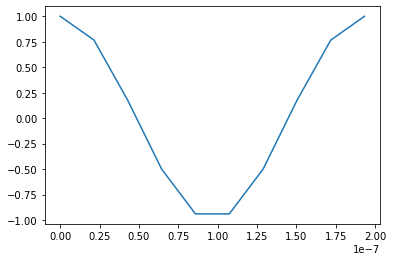

In [6]:
plt.plot(t,result.expect[0])

In [7]:
result = mesolve(H,psi_0,t)

In [8]:
result.states[-1]

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.99999989+0.j        ]
 [ 0.        +0.00046838j]]

## Making a Hadamrd Rotation

Rx(pi) pulse

In [9]:
H = spin_hamiltonian(delta=0,phi=0)
psi_0 = basis(2,1)
t = np.linspace(0,(1.933/2)*(10**(-7)),2)
result = mesolve(H,psi_0,t)

In [10]:
H = spin_hamiltonian(delta=0,phi=pi/2)
psi_0 = 1j*result.states[-1]
t = np.linspace(0,(9.66/2)*(10**(-8)),10)
result = mesolve(H,psi_0,t)

In [11]:
final_state = result.states[-1]
print(final_state)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70747722-0.00016485j]
 [-0.70673611+0.00016502j]]


In [12]:
plus_state = (basis(2,0)+basis(2,1))/sqrt(2)

In [13]:
fidelity(plus_state*plus_state.dag(),final_state*final_state.dag())

0.9999998354870279

## Now with a drift due to the permanent magnet

In [14]:
delta = 1.75*(10**7)

In [15]:
H = spin_hamiltonian(delta,phi=0)
psi_0 = basis(2,1)
t = np.linspace(0,(1.933/2)*(10**(-7)),2)
result = mesolve(H,psi_0,t)

In [16]:
H = spin_hamiltonian(delta,phi=pi/2)
psi_0 = 1j*result.states[-1]
t = np.linspace(0,(9.66/2)*(10**(-8)),10)
result = mesolve(H,psi_0,t)

In [17]:
final_state = result.states[-1]
fidelity(plus_state*plus_state.dag(),final_state*final_state.dag())

0.9355905115659015

## Now in a function

In [18]:
hadamard_evolution(0)

0.9999998354870279

In [20]:
hadamard_evolution(1.74*(10**7))

0.9358531336107373